In [23]:
import torch.nn as nn
import torch
from torchvision import models, transforms
import os
import os.path as ops
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
plt.ion()

In [79]:
def load_model(epoch):
    resume_str = '/media/data/kukleva/Study/CudaVisionLab/assignment5/models/train._ep10_lr0.001_'
#     resume_str = '/media/data/kukleva/Study/CudaVisionLab/assignment5/models/res50._ep15_lr0.0001_'
    dataset_root = '/media/data/kukleva/Study/CudaVisionLab/assignment5'
    checkpoint = torch.load(ops.join(dataset_root, 'models', '%s%d.pth.tar' % (resume_str, epoch)))
    checkpoint = checkpoint['state_dict']
    print('loaded model: ' + '%s%d.pth.tar' % (resume_str, epoch))
    return checkpoint

In [81]:
test_path = '/media/data/kukleva/Study/CudaVisionLab/assignment5/test'

def test_img(path):
    img = Image.open(path)
    plt.imshow(img)
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
    img = transform(img)
    img = img.numpy()
    img = img[np.newaxis, ...]
    img = torch.Tensor(img)

    model = models.resnet18()
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 2)

    model.load_state_dict(load_model(epoch=9))
    model.eval()

    with torch.no_grad():
        output = model(img).numpy()
        output = np.exp(output) / np.sum(np.exp(output))
        print(str(output))
        idx = np.argmax(output)
        print('prediction: %s' % ['not soccer', 'soccer'][idx])

### test images

loaded model: /media/data/kukleva/Study/CudaVisionLab/assignment5/models/train._ep10_lr0.001_9.pth.tar
[[0.0074566 0.9925434]]
prediction: soccer


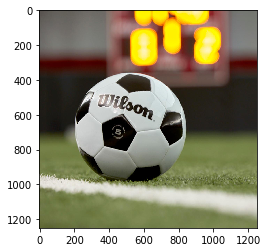

In [82]:
img1_path = os.path.join(test_path, 'test1.jpg')
test_img(img1_path)

loaded model: /media/data/kukleva/Study/CudaVisionLab/assignment5/models/train._ep10_lr0.001_9.pth.tar
[[0.8009182  0.19908181]]
prediction: not soccer


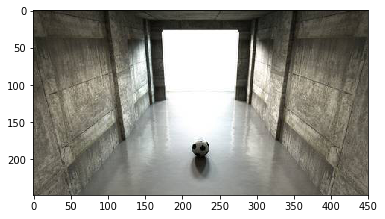

In [83]:
img1_path = os.path.join(test_path, 'test2.jpg')
test_img(img1_path)

loaded model: /media/data/kukleva/Study/CudaVisionLab/assignment5/models/train._ep10_lr0.001_9.pth.tar
[[0.9975628  0.00243717]]
prediction: not soccer


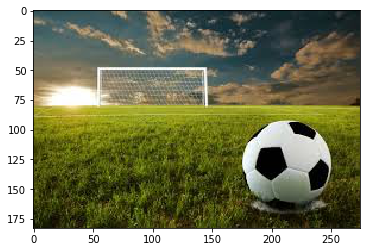

In [84]:
img1_path = os.path.join(test_path, 'test3.jpg')
test_img(img1_path)

loaded model: /media/data/kukleva/Study/CudaVisionLab/assignment5/models/train._ep10_lr0.001_9.pth.tar
[[0.46627247 0.5337275 ]]
prediction: soccer


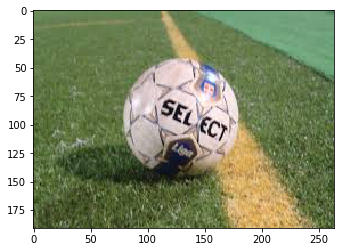

In [85]:
img1_path = os.path.join(test_path, 'test4.jpg')
test_img(img1_path)